<a href="https://colab.research.google.com/github/ancka019/data_analysis-/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
PL = pd.read_csv('PRODUCT_LIST.CSV', sep=';', encoding='Windows-1251')
PL.head()

,Product_code,Product_name,Unnamed: 2,Unnamed: 3
0,821001,Кофе ЭСПРЕССО 30 мл,NaN,NaN
1,821002,Кофе ДОППИО 60мл,NaN,NaN
2,821003,Кофе РИСТРЕТТО 20 мл,NaN,NaN
3,821004,Фильтр кофе Верньяно250мл,NaN,NaN
4,821005,Кофе ЛУНГО 50 мл,NaN,NaN


In [3]:
PL.describe(include = 'all')

,Product_code,Product_name,Unnamed: 2,Unnamed: 3
count,9786.000000,9786,1,7
unique,NaN,9563,1,6
top,NaN,Не использовать,манго,5
freq,NaN,6,1,2
mean,850216.386879,NaN,NaN,NaN
std,18368.989736,NaN,NaN,NaN
min,821001.000000,NaN,NaN,NaN
25%,840564.250000,NaN,NaN,NaN
50%,848287.500000,NaN,NaN,NaN
75%,854544.750000,NaN,NaN,NaN


In [ ]:
PL.dtypes

Product_code     int64
Product_name    object
Unnamed: 2      object
Unnamed: 3      object
dtype: object

In [ ]:
PL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9786 entries, 0 to 9785
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_code  9786 non-null   int64 
 1   Product_name  9786 non-null   object
 2   Unnamed: 2    1 non-null      object
 3   Unnamed: 3    7 non-null      object
dtypes: int64(1), object(3)
memory usage: 305.9+ KB


In [4]:
SL = pd.read_csv('SALE_LIST.csv', sep=';', encoding='Windows-1251')
SL.head()

,date,product_code,rest_code,product_count
0,06.01.2009,824021,Озерный,4
1,06.01.2009,824068,Озерный,1
2,06.01.2009,824070,Озерный,2
3,06.01.2009,824073,Озерный,1
4,06.01.2009,824074,Озерный,1


In [ ]:
SL.describe(include = 'all')

,date,product_code,rest_code,product_count
count,135920,135920.000000,135920,135920.000000
unique,1826,NaN,2,NaN
top,20.09.2012,NaN,Мечта,NaN
freq,101,NaN,73690,NaN
mean,NaN,839804.895917,NaN,11.376663
std,NaN,28968.345316,NaN,18.153321
min,NaN,821001.000000,NaN,-6.000000
25%,NaN,822006.000000,NaN,2.000000
50%,NaN,824074.000000,NaN,5.000000
75%,NaN,862094.000000,NaN,12.000000


In [ ]:
SL.dtypes

date             object
product_code      int64
rest_code        object
product_count     int64
dtype: object

In [ ]:
SL.info

<bound method DataFrame.info of               date  product_code rest_code  product_count
0       06.01.2009        824021   Озерный              4
1       06.01.2009        824068   Озерный              1
2       06.01.2009        824070   Озерный              2
3       06.01.2009        824073   Озерный              1
4       06.01.2009        824074   Озерный              1
...            ...           ...       ...            ...
135915  26.05.2013        892545     Мечта              3
135916  27.05.2013        892545     Мечта              1
135917  28.05.2013        892545     Мечта              3
135918  29.05.2013        892545     Мечта              4
135919  30.05.2013        892545     Мечта              1

[135920 rows x 4 columns]>

In [ ]:
SL.shape

(135920, 4)

In [ ]:
PL.shape

(9786, 4)

In [ ]:
PL['Product_name'].unique()

array(['Кофе ЭСПРЕССО  30 мл', 'Кофе ДОППИО 60мл',
       'Кофе РИСТРЕТТО  20 мл', ..., 'Мо Мо 120г',
       'Салат грейпфрут-манго п/ф', 'Фруктовый десерт 200г'], dtype=object)

In [ ]:
PL['Unnamed: 3'].unique()

array([nan, '5%', '6%', '75л', '33', '5', '5 см'], dtype=object)

In [6]:
PL.rename(columns = {'Product_code':'product_code'}, inplace = True)

In [7]:
mergeList = SL.merge(PL, on=["product_code"])

In [8]:
mergeList[mergeList['Product_name'] == 'Кофе ЭСПРЕССО  30 мл']

,date,product_code,rest_code,product_count,Product_name,Unnamed: 2,Unnamed: 3
50454,06.01.2009,821001,Озерный,7,Кофе ЭСПРЕССО 30 мл,NaN,NaN
50455,07.01.2009,821001,Озерный,2,Кофе ЭСПРЕССО 30 мл,NaN,NaN
50456,08.01.2009,821001,Озерный,5,Кофе ЭСПРЕССО 30 мл,NaN,NaN
50457,09.01.2009,821001,Озерный,8,Кофе ЭСПРЕССО 30 мл,NaN,NaN
50458,10.01.2009,821001,Озерный,8,Кофе ЭСПРЕССО 30 мл,NaN,NaN
...,...,...,...,...,...,...,...
54077,13.07.2013,821001,Мечта,24,Кофе ЭСПРЕССО 30 мл,NaN,NaN
54078,14.07.2013,821001,Мечта,23,Кофе ЭСПРЕССО 30 мл,NaN,NaN
54079,15.07.2013,821001,Мечта,42,Кофе ЭСПРЕССО 30 мл,NaN,NaN
54080,16.07.2013,821001,Мечта,51,Кофе ЭСПРЕССО 30 мл,NaN,NaN


In [9]:
top5 = list(mergeList.groupby('Product_name')['product_count'].sum().sort_values(ascending = False).head(5).index.values)

rest_code  Product_name        
Мечта      Кофе АМЕРИКАНО 90мл     AxesSubplot(0.125,0.125;0.775x0.755)
           Кофе КАПУЧИНО 150мл     AxesSubplot(0.125,0.125;0.775x0.755)
           Кофе Латте 300мл        AxesSubplot(0.125,0.125;0.775x0.755)
           Кофе ЭСПРЕССО  30 мл    AxesSubplot(0.125,0.125;0.775x0.755)
           Раф кофе 300мл          AxesSubplot(0.125,0.125;0.775x0.755)
Озерный    Кофе АМЕРИКАНО 90мл     AxesSubplot(0.125,0.125;0.775x0.755)
           Кофе КАПУЧИНО 150мл     AxesSubplot(0.125,0.125;0.775x0.755)
           Кофе Латте 300мл        AxesSubplot(0.125,0.125;0.775x0.755)
           Кофе ЭСПРЕССО  30 мл    AxesSubplot(0.125,0.125;0.775x0.755)
           Раф кофе 300мл          AxesSubplot(0.125,0.125;0.775x0.755)
Name: product_count, dtype: object

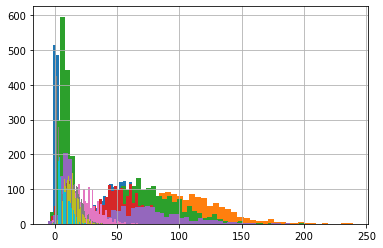

In [21]:
mergeList[mergeList['Product_name'].isin(top5)].groupby(['rest_code', 'Product_name'])['product_count'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


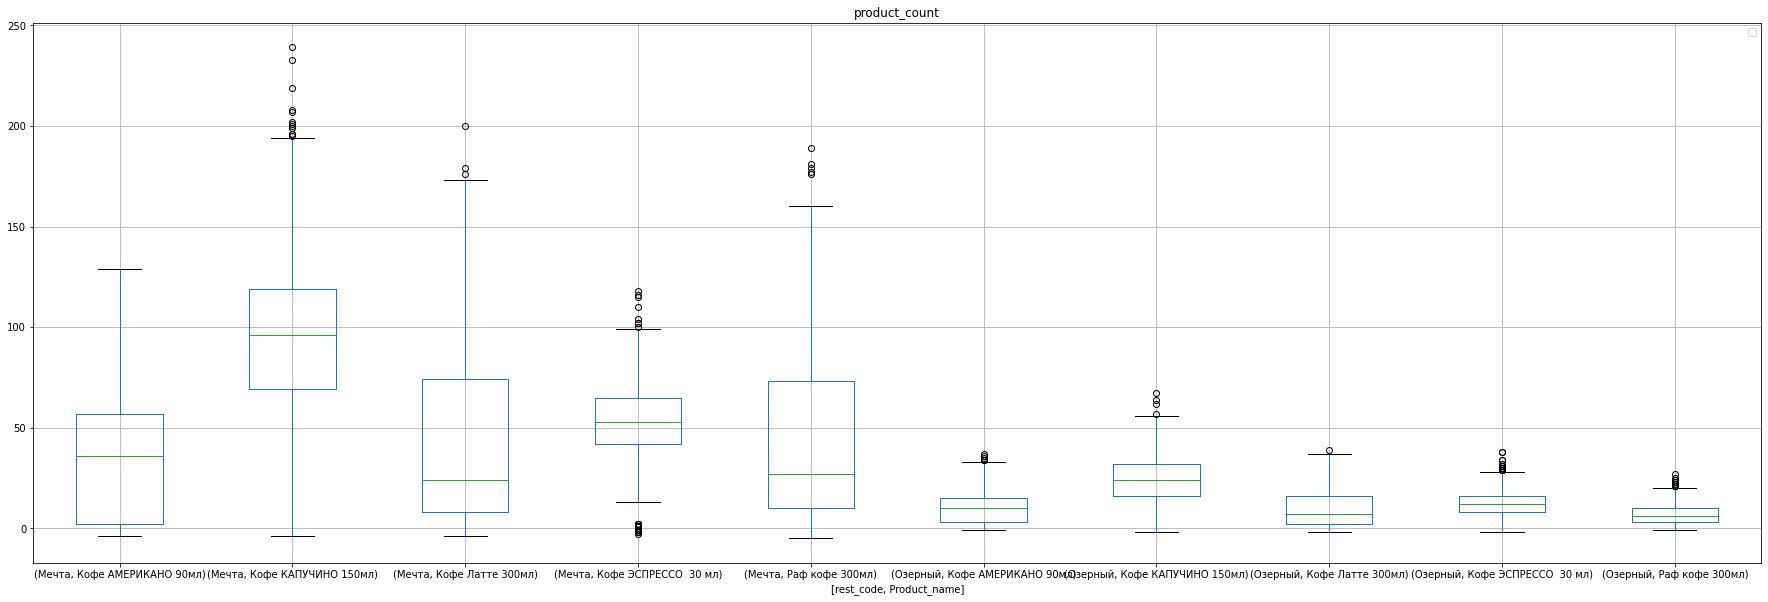

In [19]:
ax = mergeList[mergeList['Product_name'].isin(top5)].boxplot(figsize=(30,10), column='product_count', by = ['rest_code', 'Product_name'])
ax.get_figure().suptitle('')
plt.legend()

In [14]:
mergeList.groupby('Product_name')['product_count'].sum().sort_values(ascending = False)

Product_name
Кофе КАПУЧИНО 150мл          177515
Кофе Латте 300мл             174315
Кофе АМЕРИКАНО 90мл          115652
Кофе ЭСПРЕССО  30 мл         115551
Раф кофе 300мл                77722
                              ...  
Пирожное Руби 80г                74
Чай Ориентал Бьюти 600мл         63
Десерт Манифик 100г              56
Чай черн с суш мятой500мл        19
РАФ Кофе 250мл                    1
Name: product_count, Length: 110, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

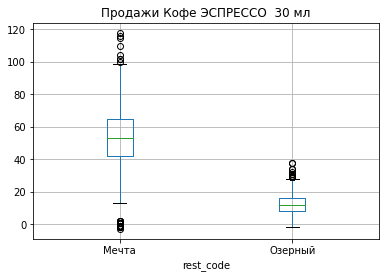

In [15]:
ax = mergeList[mergeList['Product_name'] == 'Кофе ЭСПРЕССО  30 мл'].boxplot(by = 'rest_code', column = 'product_count')
plt.title(u'Продажи Кофе ЭСПРЕССО  30 мл')
ax.get_figure().suptitle('')

In [40]:
mergeList = SL.merge(PL, on=["product_code"])

In [41]:
tl = mergeList[mergeList['rest_code'] == 'Мечта'].groupby(by=['date']).sum()['product_count'].reset_index()
fig = px.line(tl, x='date', y='product_count',
              labels={'date': 'Дата', 'product_count': 'Количество проданных продуктов', 'rest_code': 'Ресторан'})
fig.show()


In [42]:
mergeList[mergeList['rest_code'] == 'Мечта']

,date,product_code,rest_code,product_count,Product_name,Unnamed: 2,Unnamed: 3
432,01.01.2009,824021,Мечта,12,Чай красный фрукт 270мл,NaN,NaN
433,02.01.2009,824021,Мечта,18,Чай красный фрукт 270мл,NaN,NaN
434,03.01.2009,824021,Мечта,21,Чай красный фрукт 270мл,NaN,NaN
435,04.01.2009,824021,Мечта,24,Чай красный фрукт 270мл,NaN,NaN
436,05.01.2009,824021,Мечта,16,Чай красный фрукт 270мл,NaN,NaN
...,...,...,...,...,...,...,...
135915,26.05.2013,892545,Мечта,3,Десерт Манифик 100г,NaN,NaN
135916,27.05.2013,892545,Мечта,1,Десерт Манифик 100г,NaN,NaN
135917,28.05.2013,892545,Мечта,3,Десерт Манифик 100г,NaN,NaN
135918,29.05.2013,892545,Мечта,4,Десерт Манифик 100г,NaN,NaN
